In [1]:
import sys
print(sys.version)

3.8.10 (default, Mar 15 2022, 12:22:08) 
[GCC 9.4.0]


In [2]:
from wefe.query import Query
from wefe.metrics import WEAT, RNSB, RND, MAC, ECT
from wefe.word_embedding_model import WordEmbeddingModel
from wefe.datasets.datasets import load_weat, fetch_eds, fetch_debias_multiclass, fetch_debiaswe, load_bingliu
from wefe.utils import run_queries, plot_queries_results, create_ranking, plot_ranking, plot_ranking_correlations
from plotly.subplots import make_subplots
import gensim

In [3]:
data_folder = "../../Data/"
embeddings_folder = data_folder+"/word embeddings/"

In [4]:
def get_google_news_embeddings(filename,binary=False):
    w2v_model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=binary, no_header=True)
    return w2v_model


In [5]:
w2v = gensim.models.KeyedVectors.load_word2vec_format(embeddings_folder+'W2V/GoogleNews-vectors-negative300.bin',binary=True)
model_wv = WordEmbeddingModel(w2v, 'WE')



INFO:gensim.models.keyedvectors:loading projection weights from ../../Data//word embeddings/W2V/GoogleNews-vectors-negative300.bin
DEBUG:smart_open.smart_open_lib:{'uri': '../../Data//word embeddings/W2V/GoogleNews-vectors-negative300.bin', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'compression': None, 'transport_params': None}
DEBUG:gensim.utils:starting a new internal lifecycle event log for KeyedVectors
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from ../../Data//word embeddings/W2V/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-04-18T16:57:35.926046', 'gensim': '4.0.1', 'python': '3.8.10 (default, Mar 15 2022, 12:22:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-107-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}


In [7]:
glove_twitter = gensim.models.KeyedVectors.load_word2vec_format(embeddings_folder+'Glove/glove.twitter.27B/glove_2_word2vec.twitter.27B.200d.txt')
model_glove_twitter = WordEmbeddingModel(glove_twitter, 'glove_twitter')

INFO:gensim.models.keyedvectors:loading projection weights from ../../Data//word embeddings/Glove/glove.twitter.27B/glove_2_word2vec.twitter.27B.200d.txt
DEBUG:smart_open.smart_open_lib:{'uri': '../../Data//word embeddings/Glove/glove.twitter.27B/glove_2_word2vec.twitter.27B.200d.txt', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'compression': None, 'transport_params': None}
DEBUG:gensim.utils:starting a new internal lifecycle event log for KeyedVectors
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (1193514, 200) matrix of type float32 from ../../Data//word embeddings/Glove/glove.twitter.27B/glove_2_word2vec.twitter.27B.200d.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-04-18T16:58:54.695719', 'gensim': '4.0.1', 'python': '3.8.10 (default, Mar 15 2022, 12:22:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-107-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_fo

In [8]:
glove_wk = gensim.models.KeyedVectors.load_word2vec_format(embeddings_folder+'Glove/glove.6B/glove_2_word2vec.6B.200d.txt')
model_glove_wk = WordEmbeddingModel(glove_wk, 'glove_wk')

INFO:gensim.models.keyedvectors:loading projection weights from ../../Data//word embeddings/Glove/glove.6B/glove_2_word2vec.6B.200d.txt
DEBUG:smart_open.smart_open_lib:{'uri': '../../Data//word embeddings/Glove/glove.6B/glove_2_word2vec.6B.200d.txt', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'compression': None, 'transport_params': None}
DEBUG:gensim.utils:starting a new internal lifecycle event log for KeyedVectors
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (400000, 200) matrix of type float32 from ../../Data//word embeddings/Glove/glove.6B/glove_2_word2vec.6B.200d.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-04-18T16:59:37.078352', 'gensim': '4.0.1', 'python': '3.8.10 (default, Mar 15 2022, 12:22:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-107-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}


In [9]:
UD = gensim.models.KeyedVectors.load_word2vec_format(embeddings_folder+'ud_embeddings/ud_basic.vec')
model_ud = WordEmbeddingModel(UD, 'UD')

INFO:gensim.models.keyedvectors:loading projection weights from ../../Data//word embeddings/ud_embeddings/ud_basic.vec
DEBUG:smart_open.smart_open_lib:{'uri': '../../Data//word embeddings/ud_embeddings/ud_basic.vec', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'compression': None, 'transport_params': None}
DEBUG:gensim.utils:starting a new internal lifecycle event log for KeyedVectors
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (542320, 300) matrix of type float32 from ../../Data//word embeddings/ud_embeddings/ud_basic.vec', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-04-18T17:00:21.726678', 'gensim': '4.0.1', 'python': '3.8.10 (default, Mar 15 2022, 12:22:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-107-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}


In [10]:
chan = gensim.models.KeyedVectors.load_word2vec_format(embeddings_folder+'4_8_chan_word_embeddings/48chan_2_wv_embeddings.txt')
model_chan = WordEmbeddingModel(chan, 'Chan')

INFO:gensim.models.keyedvectors:loading projection weights from ../../Data//word embeddings/4_8_chan_word_embeddings/48chan_2_wv_embeddings.txt
DEBUG:smart_open.smart_open_lib:{'uri': '../../Data//word embeddings/4_8_chan_word_embeddings/48chan_2_wv_embeddings.txt', 'mode': 'rb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'compression': None, 'transport_params': None}
DEBUG:gensim.utils:starting a new internal lifecycle event log for KeyedVectors
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (255938, 150) matrix of type float32 from ../../Data//word embeddings/4_8_chan_word_embeddings/48chan_2_wv_embeddings.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-04-18T17:00:38.559895', 'gensim': '4.0.1', 'python': '3.8.10 (default, Mar 15 2022, 12:22:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.4.0-107-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}


In [9]:
# load the weat word sets
WEAT_wordsets = load_weat()
RND_wordsets = fetch_eds()
sentiments_wordsets = load_bingliu()
debias_multiclass_wordsets = fetch_debias_multiclass()

#### WEAT Effect Size: represents a normalized measure that quantifies how far apart the two distributions of association between targets and attributes are.

#### WEAT score:  Its objective is to quantify the strength of association of both pair of sets through a permutation test. The score being positive and higher than one indicates that word2vec exhibits a moderately strong relationship between men's names and careers and women's names and family.

In [10]:
data_folder = "../../Data/"

In [11]:
profane_words = open(data_folder+"swear_words.txt").read().splitlines()

In [12]:
harmless_minority_words_clean = ["lesbian","gay","bisexual","transgender","tran","queer",
                "lgbt","lgbtq","homosexual", "woman", "female", "girl","wife","sister","daughter","mother", "non-binary",
               "african", "african american", "asian", "black", "hispanic", "latin", "mexican", "indian", "middle eastern",
                "arab"]
harmless_majority_words_clean = ["hetrosexual", "cisgender", "man","male","boy","son","father","husband","brother","white","caucasian",
                                 "european american","european", "norwegian", "canadian", "german", "australian", "english",
                                "french", "american", "swedish", "dutch"]


#### running multiple queries and multiple word embeddings

In [13]:
models = [model_wv, model_glove_wk, model_glove_twitter, model_ud, model_chan]

## Query ranking

In [14]:
#query1 = Query([harmless_minority_words_clean, harmless_majority_words_clean],
   #                    [WEAT_wordsets['unpleasant_5'], WEAT_wordsets['pleasant_5']])

query2 = Query([harmless_minority_words_clean, harmless_majority_words_clean],
                       [profane_words, sentiments_wordsets['positive_words']])

gender_queries = [query2]

In [15]:
# Run the queries WEAT
WEAT_gender_results = run_queries(
    WEAT,
    gender_queries,
    models,
    aggregate_results=True,
    return_only_aggregation=True,
    lost_vocabulary_threshold = 0.6,
    queries_set_name='SOS Queries')


# Run the queries using RNSB
RNSB_gender_results = run_queries(RNSB,
                                gender_queries,
                                models,
                                aggregate_results=True,
                                return_only_aggregation=True,
                                    lost_vocabulary_threshold = 0.6,
                                queries_set_name='SOS Queries')




/home/fatma/.local/lib/python3.8/site-packages/wefe/metrics/RNSB.py:150: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  probabilities = np.array([
/home/fatma/.local/lib/python3.8/site-packages/wefe/metrics/RNSB.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  negative_probabilities = np.array(
/home/fatma/.local/lib/python3.8/site-packages/wefe/metrics/RNSB.py:150: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

In [60]:
WEAT_gender_results

,WEAT: SOS Queries average of abs values score
model_name,
WE,0.234227
glove_wk,0.351923
glove_twitter,0.618315
UD,0.381154
Chan,1.149690


In [61]:
RNSB_gender_results

,RNSB: SOS Queries average of abs values score
model_name,
WE,0.499558
glove_wk,0.463473
glove_twitter,0.424691
UD,0.628584
Chan,0.888015


In [63]:
# Run the queries using RND
RND_gender_results = run_queries(RND,
                                gender_queries,
                                models,
                                aggregate_results=True,
                                 return_only_aggregation=True,
                                generate_subqueries=True,
                                lost_vocabulary_threshold = 0.6,
                                queries_set_name='SOS Queries')




In [64]:
RND_gender_results

,RND: SOS Queries average of abs values score
model_name,
WE,0.017181
glove_wk,0.213934
glove_twitter,0.087231
UD,0.027974
Chan,0.823575


In [65]:
# Run the queries using ECT
ECT_gender_results = run_queries(ECT,
                                gender_queries,
                                models,
                                aggregate_results=True,
                                 return_only_aggregation=True,
                                generate_subqueries=True,
                                lost_vocabulary_threshold = 0.6,
                                queries_set_name='SOS Queries')

In [66]:
ECT_gender_results

,ECT: SOS Queries average of abs values score
model_name,
WE,0.756293
glove_wk,0.925768
glove_twitter,0.973232
UD,0.745732
Chan,0.817333


In [18]:
import numpy as np
import scipy

In [19]:
ECT_gender_results["ECT: SOS Queries average of abs values score"]

model_name
WE               0.756293
glove_wk         0.925768
glove_twitter    0.973232
UD               0.745732
Chan             0.817333
Name: ECT: SOS Queries average of abs values score, dtype: float64

In [42]:
sos_ranking = scipy.stats.rankdata([0.4038289786,
0.4488066542,
0.5581424338,
0.4077641887,
0.5587745237]) 


In [43]:
sos_ranking

array([1., 3., 4., 2., 5.])

In [44]:
gender_ranking = create_ranking([ WEAT_gender_results, 
                                RNSB_gender_results, RND_gender_results
                                ])
gender_ranking["ECT"] = create_ranking([ECT_gender_results], ascending=False)["ECT: SOS Queries average of abs values score"]
gender_ranking["SOS_all_min"] = sos_ranking
#gender_ranking["SOS_women"] = sos_women_ranking
#gender_ranking["SOS_lgtbq"] = sos_lgtbq_ranking
#gender_ranking["SOS_eth"] = sos_eth_ranking

In [45]:
plot_ranking(gender_ranking, use_metric_as_facet=True)

In [46]:
gender_ranking

,WEAT: SOS Queries average of abs values score,RNSB: SOS Queries average of abs values score,RND: SOS Queries average of abs values score,ECT,SOS_all_min
model_name,,,,,
WE,1.0,3.0,1.0,4.0,1.0
glove_wk,2.0,2.0,4.0,2.0,3.0
glove_twitter,4.0,1.0,3.0,1.0,4.0
UD,3.0,4.0,2.0,5.0,2.0
Chan,5.0,5.0,5.0,3.0,5.0


In [47]:
from wefe.utils import calculate_ranking_correlations, plot_ranking_correlations
correlations = calculate_ranking_correlations(gender_ranking)
correlations

,WEAT: SOS Queries average of abs values score,RNSB: SOS Queries average of abs values score,RND: SOS Queries average of abs values score,ECT,SOS_all_min
WEAT: SOS Queries average of abs values score,1.0,0.3,0.7,-0.3,0.9
RNSB: SOS Queries average of abs values score,0.3,1.0,0.2,0.7,0.1
RND: SOS Queries average of abs values score,0.7,0.2,1.0,-0.5,0.9
ECT,-0.3,0.7,-0.5,1.0,-0.6
SOS_all_min,0.9,0.1,0.9,-0.6,1.0


In [48]:
correlation_fig = plot_ranking_correlations(correlations)
correlation_fig.show()

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f883f911430>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f883f911430> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/home/fatma/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf'
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = '/home/fatma/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /home/fatma/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.
DEBUG:matplotlib.backends.backend_pdf:Embedding font /home/fatma/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writi

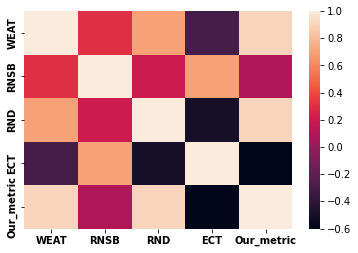

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations,
           xticklabels = ["WEAT", "RNSB", "RND", "ECT", "Our_metric"],
           yticklabels = ["WEAT", "RNSB", "RND", "ECT", "Our_metric"])

plt.yticks(fontweight="bold", fontsize="10")
plt.xticks(fontweight="bold", fontsize="10")

plt.savefig("sos_bias_metrics_corr.pdf", dpi=1200)

## correlate between the bias scores and the F1 scores of the Twitter-sex datasets

In [50]:
import pandas as pd

In [51]:
F1_Twitter_sex_ds_bilstm= [0.659,0.661,0.661,0.625,0.631]
F1_Twitter_sex_ds_mlp= [0.587,0.587,0.589,0.578,0.563]

## correlation between F1 scores and bias metric Rankings

In [52]:
gender_ranking["F1_Twitter_sex_ds_bilstm"] = scipy.stats.rankdata(F1_Twitter_sex_ds_bilstm)
gender_ranking["F1_Twitter_sex_ds_mlp"] = scipy.stats.rankdata(F1_Twitter_sex_ds_mlp)

##  correlate between the bias scores and the F1 scores of the hateeval datasets

In [53]:
F1_HateEval_ds_bilstm= [0.663, 0.651, 0.671, 0.661, 0.661]
F1_HateEval_ds_mlp= [0.593, 0.583, 0.623, 0.597, 0.627]

In [54]:
gender_ranking["F1_hateeval_ds_bilstm"] = scipy.stats.rankdata(F1_HateEval_ds_bilstm)
gender_ranking["F1_hateeval_ds_mlp"] = scipy.stats.rankdata(F1_HateEval_ds_mlp)

##  correlate between the bias scores and the F1 scores of the Twitter-racism datasets

In [55]:
F1_twitter_racism_ds_bilsmt= [0.717, 0.727, 0.699, 0.698, 0.712]
F1_twitter_racism_ds_mlp = [0.683, 0.681, 0.680, 0.679, 0.650]

In [56]:
gender_ranking["F1_twitter_racism_ds_bilstms"] = scipy.stats.rankdata(F1_twitter_racism_ds_bilsmt)
gender_ranking["F1_twitter_racism_ds_mlp"] = scipy.stats.rankdata(F1_twitter_racism_ds_mlp)

##  correlate between the bias scores and the F1 scores of the Twitter-hate datasets

In [57]:
F1_twitter_hate_ds_bilsmt= [0.772, 0.821, 0.851, 0.837, 0.840]
F1_twitter_hate_ds_mlp = [0.681, 0.713, 0.775, 0.780, 0.692]

In [58]:
gender_ranking["F1_twitter_hate_ds_bilsmt"] = scipy.stats.rankdata(F1_twitter_hate_ds_bilsmt)
gender_ranking["F1_twitter_hate_ds_mlp"] = scipy.stats.rankdata(F1_twitter_hate_ds_mlp)

In [70]:
gender_ranking.corr("pearson")

,WEAT: SOS Queries average of abs values score,RNSB: SOS Queries average of abs values score,RND: SOS Queries average of abs values score,ECT,SOS_all_min,F1_Twitter_sex_ds_bilstm,F1_Twitter_sex_ds_mlp,F1_hateeval_ds_bilstm,F1_hateeval_ds_mlp,F1_twitter_racism_ds_bilstms,F1_twitter_racism_ds_mlp,F1_twitter_hate_ds_bilsmt,F1_twitter_hate_ds_mlp
WEAT: SOS Queries average of abs values score,1.000000,0.300000,7.000000e-01,-3.000000e-01,0.900000,-0.205196,-0.359092,0.102598,0.900000,-0.500000,-0.900000,0.900000,3.000000e-01
RNSB: SOS Queries average of abs values score,0.300000,1.000000,2.000000e-01,7.000000e-01,0.100000,-0.872082,-0.974679,-0.359092,0.400000,-0.200000,-0.600000,-0.100000,-2.000000e-01
RND: SOS Queries average of abs values score,0.700000,0.200000,1.000000e+00,-5.000000e-01,0.900000,0.153897,-0.359092,-0.461690,0.400000,0.200000,-0.600000,0.500000,4.440892e-17
ECT,-0.300000,0.700000,-5.000000e-01,1.000000e+00,-0.600000,-0.872082,-0.615587,-0.205196,-0.100000,-0.300000,-0.100000,-0.500000,-8.881784e-17
SOS_all_min,0.900000,0.100000,9.000000e-01,-6.000000e-01,1.000000,0.153897,-0.205196,-0.051299,0.700000,-0.100000,-0.700000,0.800000,1.000000e-01
F1_Twitter_sex_ds_bilstm,-0.205196,-0.872082,1.538968e-01,-8.720816e-01,0.153897,1.000000,0.815789,0.157895,-0.359092,0.564288,0.564288,0.051299,-1.538968e-01
F1_Twitter_sex_ds_mlp,-0.359092,-0.974679,-3.590924e-01,-6.155870e-01,-0.205196,0.815789,1.000000,0.526316,-0.359092,0.153897,0.666886,0.051299,1.025978e-01
F1_hateeval_ds_bilstm,0.102598,-0.359092,-4.616903e-01,-2.051957e-01,-0.051299,0.157895,0.526316,1.000000,0.410391,-0.410391,0.153897,0.359092,-5.129892e-02
F1_hateeval_ds_mlp,0.900000,0.400000,4.000000e-01,-1.000000e-01,0.700000,-0.359092,-0.359092,0.410391,1.000000,-0.600000,-0.800000,0.800000,1.000000e-01
F1_twitter_racism_ds_bilstms,-0.500000,-0.200000,2.000000e-01,-3.000000e-01,-0.100000,0.564288,0.153897,-0.410391,-0.600000,1.000000,0.600000,-0.600000,-7.000000e-01
